In [105]:
# -*-coding:utf-8 -*-
import csv
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

with open ('../homework2/homework2.csv','r') as f:
    data = list(csv.reader(f))
print(data)

[['晚報：安邦集團原董事長吳小暉被起訴，涉集資詐騙、職務侵佔等商業罪行', '2018-02-23'], ['早報：國際特赦組織指港府起訴和平示威者、《國歌法》可定罪均釀寒蟬效應', '2018-02-23'], ['晚報：特朗普接見校園槍擊倖存者，提議讓教師配槍應付槍擊案「瘋子」', '2018-02-22'], ['早報：美國著名基督教佈道家葛培理逝世，終年99歲', '2018-02-22'], ['晚報：美方稱副總統彭斯原定冬奧期間會晤北韓代表團，但北韓臨時失約', '2018-02-21'], ['早報：敘利亞親政府武裝開進北部阿夫林，揚言反擊土耳其軍事行動', '2018-02-21'], ['晚報：美澳印日擬推區域聯合基礎建設計劃，被指為抗衡中國「一帶一路」', '2018-02-20'], ['早報：梵蒂岡或將最快於3月份與中國簽署主教任命協議', '2018-02-20'], ['晚報：佛羅里達校園槍擊案，19歲疑犯去年因操行被退學、近一年未應精神病覆診', '2018-02-15'], ['早報：佛羅里達州發生高中校園槍擊案，至少17人死、19歲學校舊生被捕', '2018-02-15'], ['晚報：NHK指中央政治局前常委周永康洩密，觸發金正恩處決姑丈、刺殺兄長', '2018-02-14'], ['早報：曾主管網信辦而號稱「網路沙皇」，中共宣傳部原副部長魯煒涉嚴重違紀被「雙開」', '2018-02-14'], ['晚報：前重慶市委書記孫政才涉貪被起訴，控罪暗示其涉整個仕途受賄', '2018-02-13'], ['早報：「金日成」隨北韓啦啦隊現身冬奧？南韓政府澄清未息右翼團體不滿', '2018-02-13'], ['晚報：被教廷要求讓位後首次接受專訪，大陸合法主教郭希錦稱只能服從', '2018-02-12'], ['早報：北韓代表團結束南韓行程，金正恩透過胞妹邀請文在寅訪問平壤', '2018-02-12'], ['早報：香港發生嚴重巴士車禍致19人死亡、車長涉危險駕駛被捕', '2018-02-11'], ['晚報：美國聯邦政府今年內第二度停擺，能否迅速復工還看眾議院', '2018-02-09'], ['早報：敘利亞政權持續空襲首都市郊，另譴責美軍「屠殺」百名親政權武裝', '2018-02-09'], ['晚報：平昌冬奧前夕，

['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23'] [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]


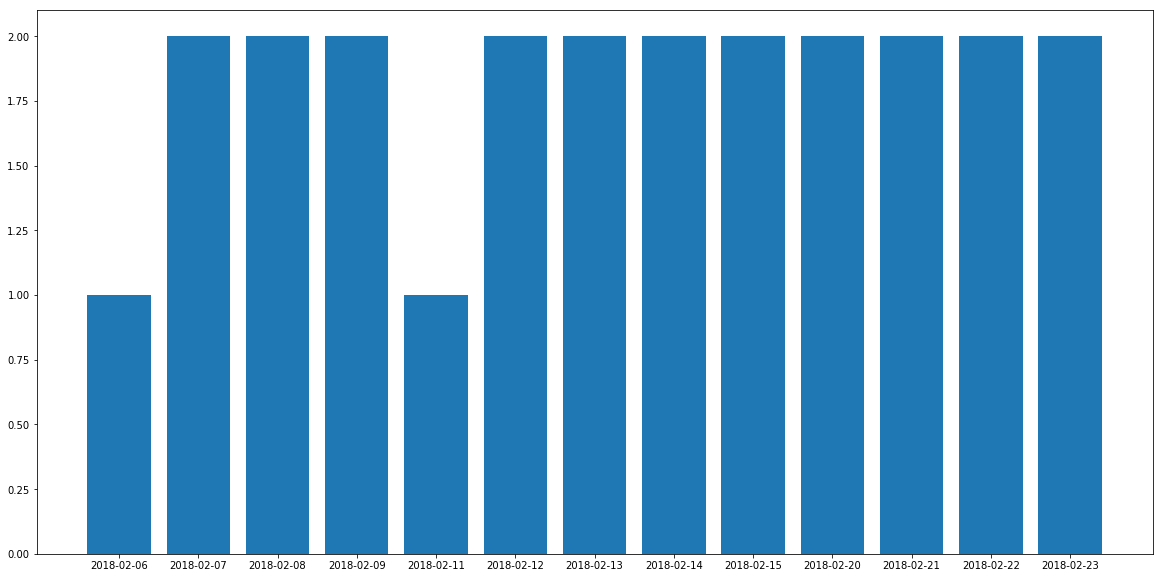

In [52]:
# 1 按照日期显示新闻数量
data_by_date = {}

# 对数据进行提取统计，并处理x，y轴数据
for item in data:
    if item[1] in data_by_date:
        data_by_date[item[1]] += 1
    else:
        data_by_date[item[1]] = 1 
list_x = sorted(list(data_by_date.keys()))
list_y = [data_by_date[x] for x in list_x]
print(list_x, list_y)

  
# 设置图像大小并输出保存
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
bar = plt.bar(range(len(list_x)), list_y,tick_label=list_x)
fig.savefig('news_num_by_data.png')
plt.show()  

[24, 25, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 42] [1, 1, 3, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1]


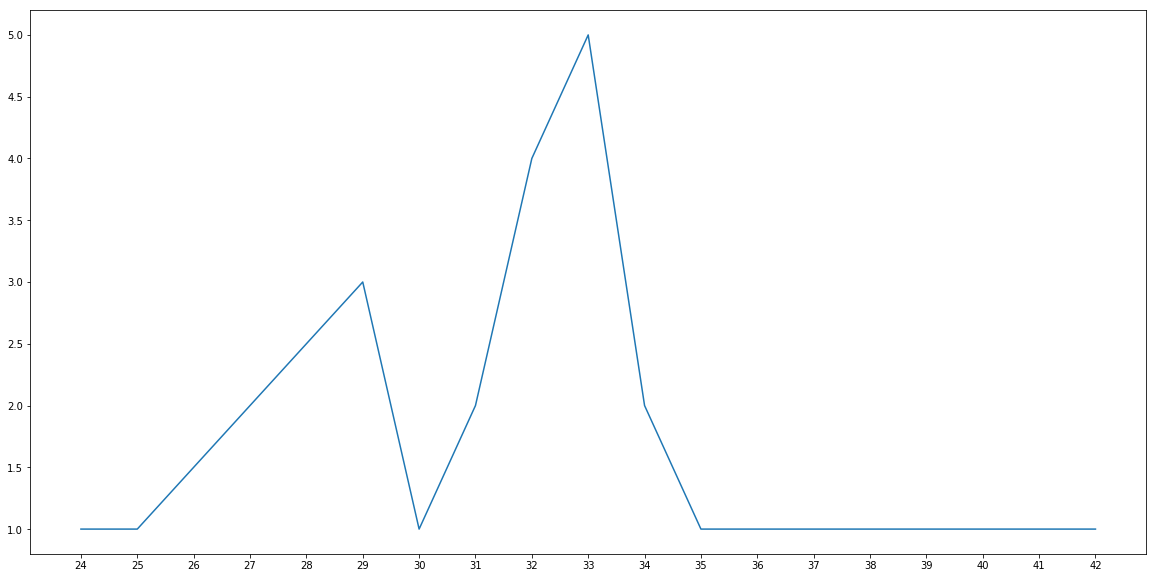

In [66]:
#2 标题长度统计

# 按照不同的长度统计标题的数量
data_by_title = {}
for item in data:
    length = len(item[0])
    if length in data_by_title:
        data_by_title[length] += 1
    else:
        data_by_title[length] = 1 
list_x = sorted(list(data_by_title.keys()))
list_y = [data_by_title[x] for x in list_x]
print(list_x, list_y)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
bar = plt.plot(list_x,list_y)
plt.xticks(range(24,43), rotation=0)  
fig.savefig('title_by_length.png')
plt.show()  


[('政府', 3), ('19', 3), ('槍擊案', 3), ('校園', 3), ('南韓', 3), ('起訴', 3), ('嚴重', 2), ('死亡', 2), ('中國', 2), ('發生', 2), ('佛羅里', 2), ('代表', 2), ('主教', 2), ('金正恩', 2)] ['政府', '19', '槍擊案', '校園', '南韓', '起訴', '嚴重', '死亡', '中國', '發生', '佛羅里', '代表', '主教', '金正恩'] [3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]


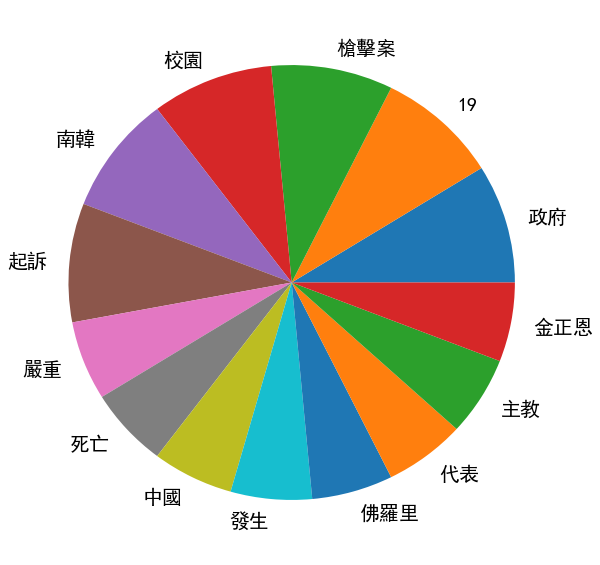

In [121]:
#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# 3 关键词饼图
import jieba.analyse
from collections import Counter
tags = []
final_res = []
# 统计关键词
for item in data:
    content = item[0][3:-1]
    tags.extend(jieba.analyse.extract_tags(content))
res = Counter(tags)
# 取所有词频大于1的关键词
for item in res.items():
    if item[1] > 1:
        final_res.append(item)
final_res.sort(key=lambda x: x[1], reverse=True)
list_y = [item[1] for item in final_res]
list_x = [item[0] for item in final_res]
print(final_res, list_x, list_y)

# 绘图
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
patches,l_text = plt.pie(list_y,labels=list_x)
[x.set_size(20) for x in l_text]
fig.savefig('key_word_pie.png')
plt.show()